# Assigment 5

Learn your own latent direction
- Download a few images that clearly show the direction that you want to learn (e.g. 20 blonde and 20 brunette women or N faces with sunglasses and N without).
- Align the images and learn their latent codes.
- Train a linear classifier (SVM) to learn the latent direction.
- Apply this latent direction to a few real images.

In [1]:
import glob
import os
import numpy as np
import glob
import PIL.Image as Image
import face_alignment
import sys
from tqdm.notebook import tqdm
from IPython.utils import io
from sklearn import svm
import matplotlib.pyplot as plt


In [81]:
# disable warnings
!import warnings
!warnings.filterwarnings("ignore")

import: unable to open X server `' @ error/import.c/ImportImageCommand/347.
/usr/bin/sh: -c: line 0: syntax error near unexpected token `"ignore"'
/usr/bin/sh: -c: line 0: `warnings.filterwarnings("ignore")'


In [82]:
!pwd

/work3/s194262/GitHub/stylegan2-ada-pytorch


In [ ]:
#!git pull https://github.com/happy-jihye/FFHQ-Alignment.git

## Testing the StyleGAN

In [85]:
# choose folder
name = 'aron'
out = '/work3/s194253/02514/project3/latent_direction/examples/' + name + '/'


In [86]:
# align image
src = out # no naming
dst = out

!python FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py -s {src} -d {dst}




FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py:85: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_size, output_size), PIL.Image.ANTIALIAS)


In [90]:
target = dst + '/align-me-3.png'

In [91]:
with io.capture_output() as captured:
    !python projector.py --outdir={out} --target={target} \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

In [ ]:
# look in the folder :))

## Downloaded images

In [4]:
# loading images
dir_path = '/work3/s194253/02514/project3/latent_direction/'
contrast = 'hair/'
zero = 'no_hair'
one = 'hair'
data_path = dir_path + contrast

In [5]:
young = glob.glob(data_path + f'/{one}/*.png')
old = glob.glob(data_path + f'/{zero}/*.png')

In [6]:
# checking sizes
all_sizes = []
for i_path, l_path in zip(young, old):
    all_sizes.append(Image.open(i_path).size)
    all_sizes.append(Image.open(l_path).size)
print(len(set(all_sizes)))
print(set(all_sizes))

18
{(682, 1023), (476, 357), (2048, 2048), (640, 320), (509, 339), (320, 404), (480, 563), (1000, 704), (612, 612), (540, 360), (737, 1106), (1200, 828), (1000, 1620), (800, 1200), (612, 408), (390, 280), (1000, 1500), (800, 1000)}


## Aligning images

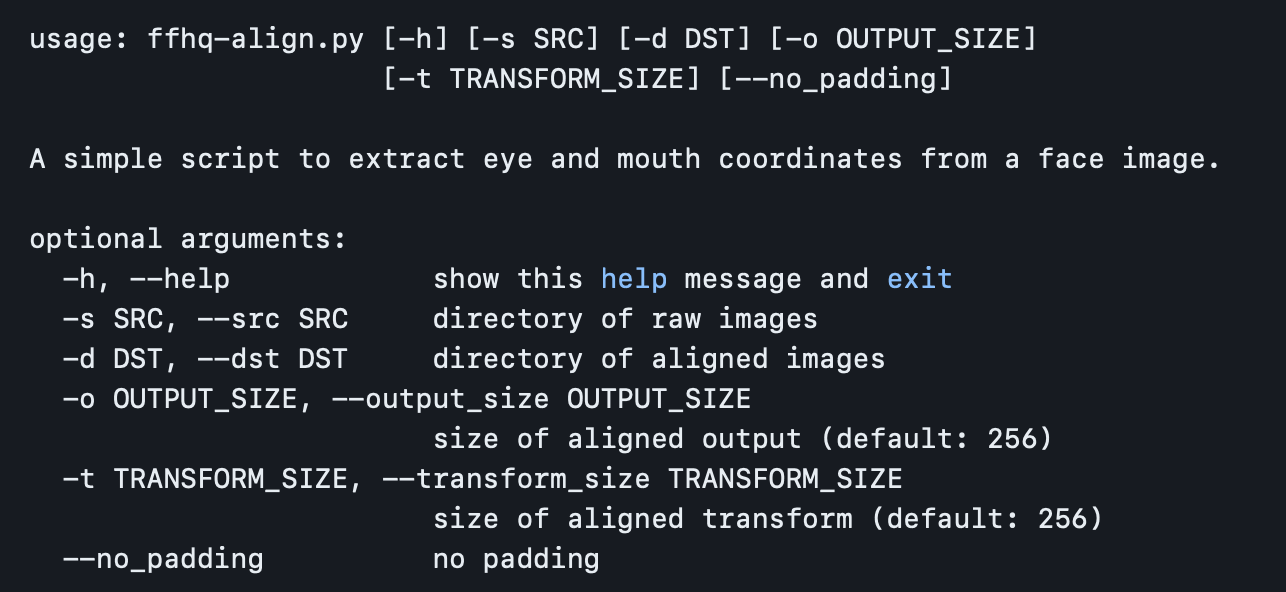

In [9]:
# young
#obj = 'young'
src = data_path+zero
dst = data_path+f'{zero}_aligned'

In [10]:

!python FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py -s {src} -d {dst}




FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py:85: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_size, output_size), PIL.Image.ANTIALIAS)
Traceback (most recent call last):
  File "FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py", line 110, in <module>
    for i, face_landmarks in enumerate(landmarks_detector.get_landmarks(raw_img_path), start=1):
  File "/work3/s194262/venv/lib/python3.7/site-packages/face_alignment/api.py", line 89, in get_landmarks
    return self.get_landmarks_from_image(image_or_path, detected_faces)
  File "/work3/s194262/venv/lib/python3.7/site-packages/torch/autograd/grad_mode.py", line 26, in decorate_context
    return func(*args, **kwargs)
  File "/work3/s194262/venv/lib/python3.7/site-packages/face_alignment/api.py", line 105, in get_landmarks_from_image
    image = get_image(image_or_path)
  File "/work3/s194262/venv/lib/python3.7/site-packages/face_

In [11]:
src = data_path+one
dst = data_path+f'{one}_aligned'

In [12]:
!python FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py -s {src} -d {dst}


FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py:85: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_size, output_size), PIL.Image.ANTIALIAS)
FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py:55: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(rsize, PIL.Image.ANTIALIAS)
Traceback (most recent call last):
  File "FFHQ-Alignment/FFHQ-Alignmnet/ffhq-align.py", line 110, in <module>
    for i, face_landmarks in enumerate(landmarks_detector.get_landmarks(raw_img_path), start=1):
  File "/work3/s194262/venv/lib/python3.7/site-packages/face_alignment/api.py", line 89, in get_landmarks
    return self.get_landmarks_from_image(image_or_path, detected_faces)
  File "/work3/s194262/venv/lib/python3.7/site-packages/torch/autograd/grad_mode.py", line 26, in decorate_context
    return func(*arg

## Their latent code

In [17]:

young_aligned = glob.glob(data_path + f'/{zero}_aligned/*.png')
old_aligned = glob.glob(data_path + f'/{one}_aligned/*.png')

In [18]:
young_latents = []
with tqdm(total=len(young_aligned)) as pbar:
    for i, img_path in enumerate(young_aligned):
        with io.capture_output() as captured:
            out = data_path+f'{zero}_latents/{i}'
            target = img_path
            !python projector.py --outdir={out} --target={target} \
            --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

            #latent = np.load(f'{out}/projected_w.npz')['w']
            #young_latents.append(latent)

        print(f'{i}: DONE')

  0%|          | 0/8 [00:00<?, ?it/s]

0: DONE
1: DONE
2: DONE
3: DONE
4: DONE
5: DONE
6: DONE
7: DONE


In [19]:
old_latents = []
with tqdm(total=len(old_aligned)) as pbar:
    for i, img_path in enumerate(old_aligned):
        with io.capture_output() as captured:
            out = data_path+f'{one}_latents/{i}'
            target = img_path
            !python projector.py --outdir={out} --target={target} \
            --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

            #latent = np.load(f'{out}/projected_w.npz')['w']
            #old_latents.append(latent)
        print(f'{i}: DONE')


  0%|          | 0/8 [00:00<?, ?it/s]

0: DONE
1: DONE
2: DONE
3: DONE
4: DONE
5: DONE
6: DONE
7: DONE


## Training SVD for direction

### learning w

In [17]:
# age
dir_path = '/work3/s194253/02514/project3/latent_direction/'
contrast = 'age/'
data_path = dir_path+contrast
#
folder_zero = 'young_latents'
folder_one = 'old_latents'
zero_latents = glob.glob(data_path + f'/{folder_zero}/*/*.npz')
one_latents = glob.glob(data_path + f'/{folder_one}/*/*.npz')

In [36]:
# caricature
dir_path = '/work3/s194253/02514/project3/latent_direction/'
contrast = 'caricature/'
data_path = dir_path+contrast
#
folder_zero = 'normal_latent'
folder_one = 'caricature_latent'
zero_latents = glob.glob(data_path + f'{folder_zero}/*/*.npz')
one_latents = glob.glob(data_path + f'{folder_one}/*/*.npz')

In [38]:
# constructing data for SVM
X = []
y = []
for latent_path in zero_latents:
    latent = np.load(latent_path)['w'].squeeze(0)
    # remove [1,18,512]
    X.append(latent)
    y.append(0)
    
for latent_path in one_latents:
    latent = np.load(latent_path)['w'].squeeze(0)
    # remove [1,18,512]
    X.append(latent)
    y.append(1)
X = np.array(X)

In [39]:
# each of the 18 dimensions independently
'''
w = []
transformations = 18
for i in range(transformations):
    clf = svm.SVC(kernel='linear')
    clf.fit(X[:,i,:], y)
    w.append(clf.coef_.squeeze(0)+clf.intercept_)
w = np.array(w)
'''

"\nw = []\ntransformations = 18\nfor i in range(transformations):\n    clf = svm.SVC(kernel='linear')\n    clf.fit(X[:,i,:], y)\n    w.append(clf.coef_.squeeze(0)+clf.intercept_)\nw = np.array(w)\n"

In [40]:
# all dimensions at once

clf = svm.SVC(kernel='linear')
clf.fit(X.reshape(len(y), -1), y)
w = np.array(clf.coef_.reshape(18, 512)) #+clf.intercept_
w = w / np.linalg.norm(w)

## Applying on real images

In [ ]:
# TODO: save and load the weights w?

Remember: the w is the one from above!

In [119]:
# NOTE: define new (existing) or continue with above by skipping this cell

dir_path = '/work3/s194253/02514/project3/latent_direction/'
# example person
person = '/andreas/'
# experiment name
contrast = 'caricature/'

In [120]:
contrast

'caricature/'

In [121]:
# name
exp_name = 'caricature/'

# creating paths:
path = dir_path + 'examples'
out_path = path + person + exp_name
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [122]:
# magnitudes
ms = np.linspace(0, 100, 5)


In [123]:
# example person weights
example_w = np.load(path + person + 'projected_w.npz')['w'].squeeze(0)

out_projected_folder = out_path + f'ws/' # ordered
if not os.path.exists(out_projected_folder):
    os.makedirs(out_projected_folder)
for i, m in enumerate(ms):
    with io.capture_output() as captured:
        out_projected = out_projected_folder + f'{i}.npz' # ordered
        np.savez(out_projected, w=np.expand_dims(example_w + m * w, axis=0))
        # generate images
        out_dir = out_path+f'imgs/{i}'
        !python generate.py --outdir={out_dir} --projected-w={out_projected} \
        --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl


## Plotting

In [106]:
# NOTE: define new (existing) or continue with above by skipping this cell

# example person
person = '/phillip/'
# experiment name
exp_name = 'age_test/'

# creating paths:
path = dir_path + 'examples'
out_path = path + person + exp_name
if not os.path.exists(out_path):
    os.makedirs(out_path)

PermissionError: [Errno 13] Permission denied: '/work3/s194253/02514/project3/latent_direction/caricature/examples'

In [124]:
# loading images
directed_imgs = []
for i in range(len(ms)):
    directed_imgs.append(glob.glob(out_path+f'imgs/{i}/*.png')[0])


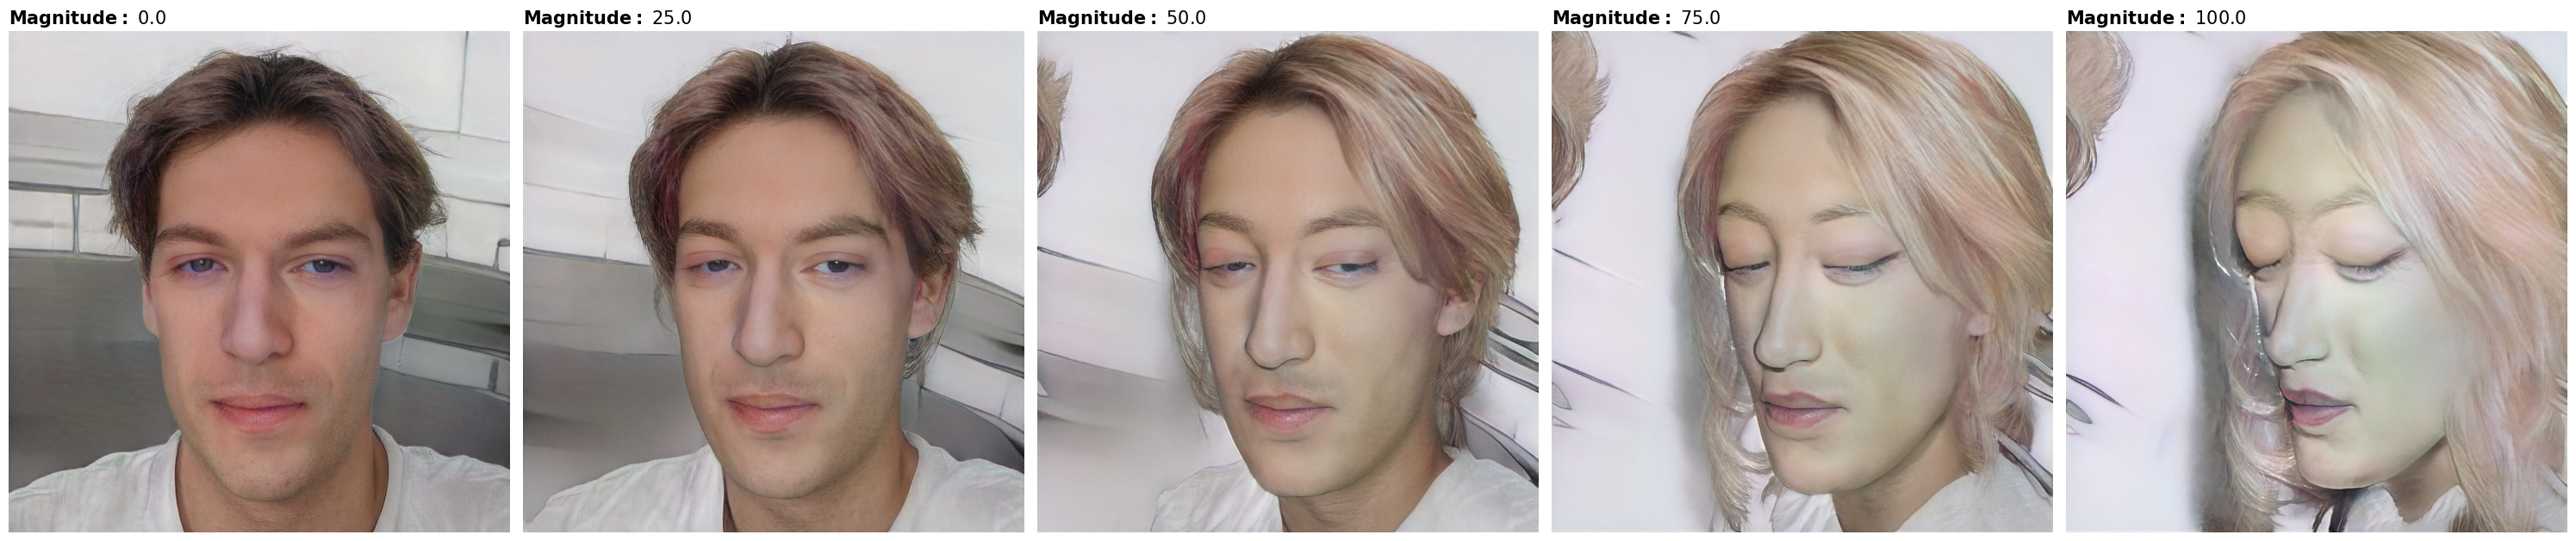

In [125]:
# plotting
fig, axs = plt.subplots(1, len(directed_imgs), figsize=(30, 10))
for i, (m, img_path) in enumerate(zip(ms, directed_imgs)):    
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('$\mathbf{Magnitude:}$ ' + str(np.round(m, 2)), loc='left', fontsize=15)

plt.tight_layout()
plt.savefig(out_path + 'projected.png')
plt.show()

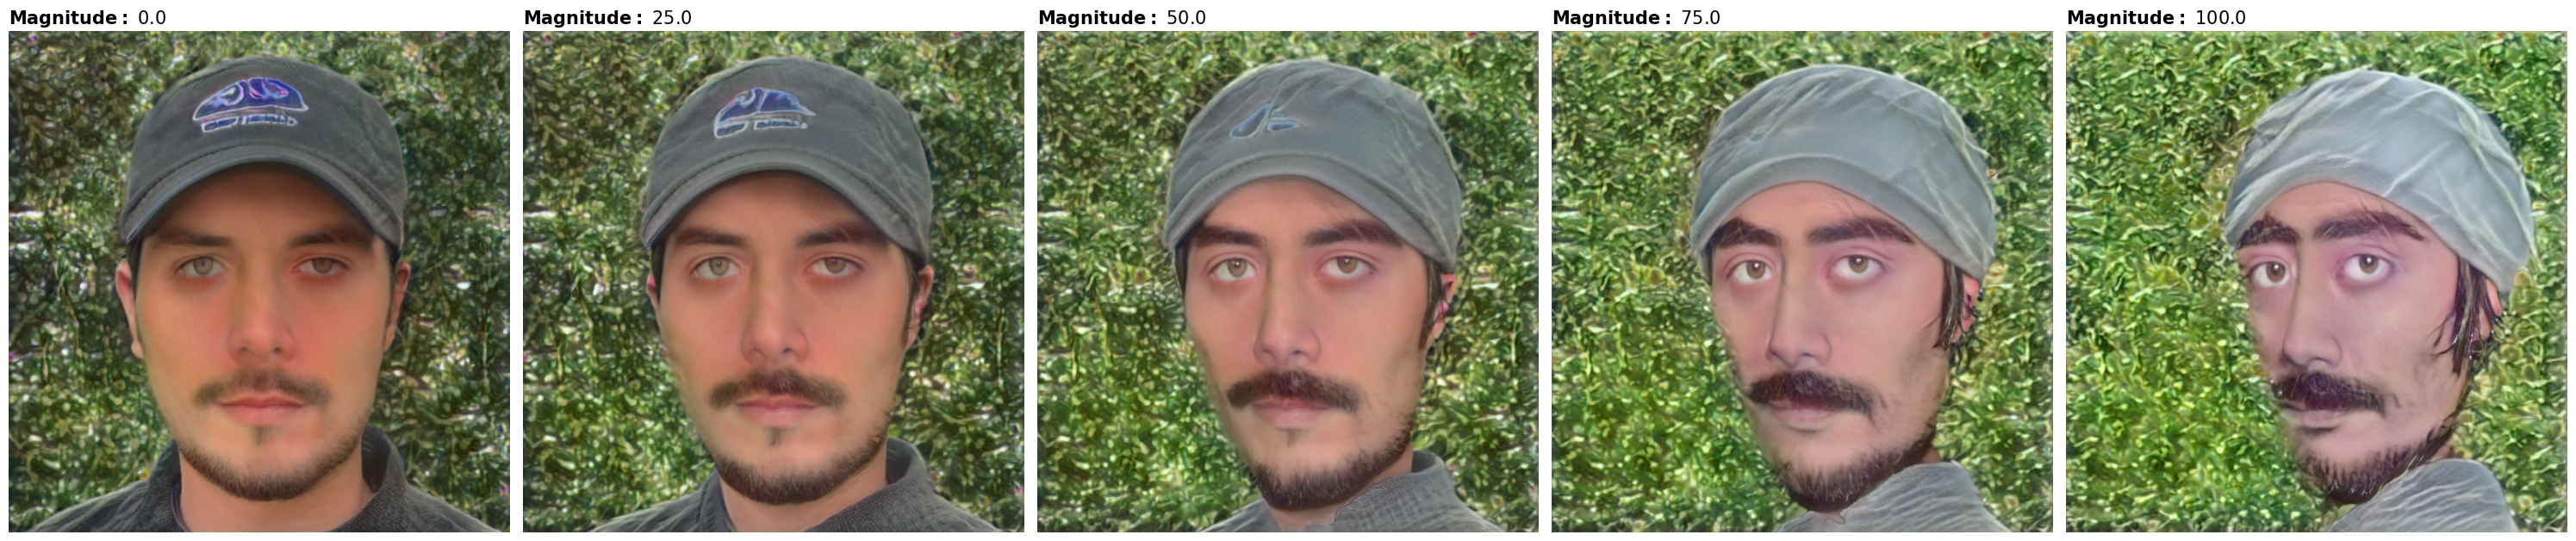

In [141]:

# example person
person = '/phillip/'
# experiment name
exp_name = 'caricature/'

# creating paths:
path = dir_path + 'examples'
out_path = path + person + exp_name


# magnitudes
ms = np.linspace(0, 100, 5)

# loading images
directed_imgs = []
for i in range(len(ms)):
    directed_imgs.append(glob.glob(out_path+f'imgs/{i}/*.png')[0])

    
# plotting
fig, axs = plt.subplots(1, len(directed_imgs), figsize=(30, 10))
for i, (m, img_path) in enumerate(zip(ms, directed_imgs)):    
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('$\mathbf{Magnitude:}$ ' + str(np.round(m, 2)), loc='left', fontsize=15)

plt.tight_layout()
plt.savefig(out_path + 'projected.png', bbox_inches='tight')
plt.show()